<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [16]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
%matplotlib inline

In [17]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [18]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [85]:
print(np.dot(x1, x2))

234704.86490859918


Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [192]:
x

array([0.00632, 0.02731])

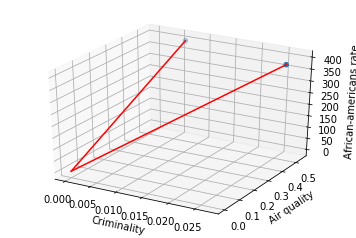

In [199]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = boston.data[:2, 0] # Криминогенность
y = boston.data[:2, 4] # Качество воздуха
z = boston.data[:2, 11] # Доля афро-американского населения в районе

ax.scatter(x, y, z)
ax.set_xlabel('Criminality')
ax.set_ylabel('Air quality')
ax.set_zlabel('African-americans rate')
ax.plot([0,x[0]],[0,y[0]],[0,z[0]], 'red')
ax.plot([0,x[1]],[0,y[1]],[0,z[1]], 'red')

In [213]:
our_house = np.array([x,y,z]).T

Найти косинус угла между векторами x1 и x2

In [222]:
l1 = np.sqrt((our_house[0]**2).sum())
l2 = np.sqrt((our_house[1]**2).sum())
print(np.dot(our_house[0], our_house[1]) / (l1 * l2))

0.9999999834902017


Косинус угла стремится к единице, а это значит, что угол стремиться к нулю. Наши дома довольно близки в 3х-мерном пространстве признаков.

Найти расстояние между точками x1 и x2.

In [165]:
import scipy as sp
import time

In [170]:
# Например евклидово расстояние можно найти так
%time
sp.spatial.distance.euclidean(x1,x2)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


58.955079696240766

In [172]:
# А можно и так
%time
np.sqrt(((x1-x2)**2).sum())

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


58.955079696240766

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

Действие смещения будем выполнять после выполнения масштабирования и поворота, т.к. это удобнее делать, когда объект находится в начале координат

(-200, 200)

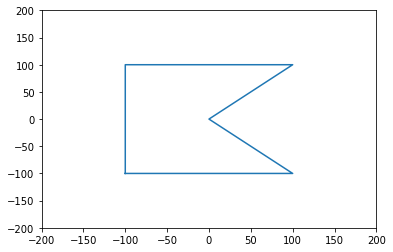

In [251]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Уменьшить объект в два раза.

(-200, 200)

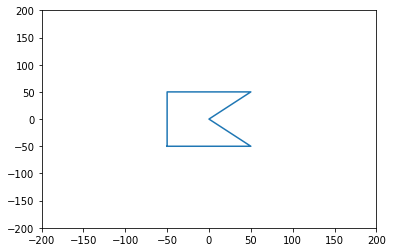

In [299]:
B = np.array([[0.5, 0, 0],
              [0, 0.5, 0],
              [0, 0 , 1]])
reducedA = np.dot(B, A.T).T

x = reducedA[:,0]
y = reducedA[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

(-200, 200)

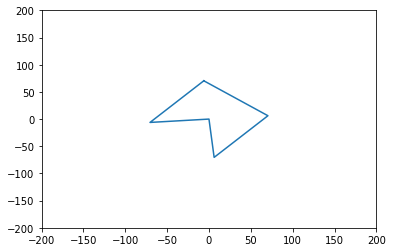

In [300]:
theta = np.deg2rad(130)
C = np.array([[np.cos(theta), np.sin(theta), 0],
              [-np.sin(theta), np.cos(theta), 0],
              [0, 0 , 1]])
rotatedA = np.dot(C, reducedA.T).T

x = rotatedA[:,0]
y = rotatedA[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Сместим объект по оси x на 300 пикселей, по оси y на 200 пикселей

(0, 600)

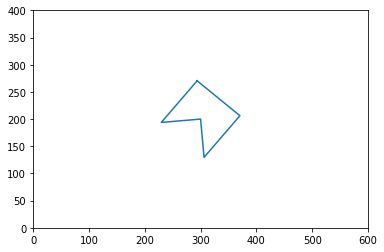

In [313]:
D = np.array([[1, 0, 300],
              [0, 1, 200],
              [0, 0 , 1]])

shiftedA = np.dot(D, rotatedA.T).T

x = shiftedA[:,0]
y = shiftedA[:,1]
plt.plot(x, y)
plt.ylim([0, 400])
plt.xlim([0, 600])

Отразить объект относительно прямой y=x

(-300, 500)

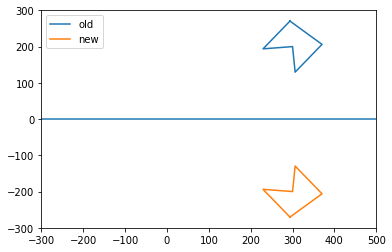

In [324]:
E = np.array([[1, 0, 0],
              [0, -1, 0],
              [0, 0, 1]])

mirroredA = np.dot(E, shiftedA.T).T

new_x = mirroredA[:,0]
new_y = mirroredA[:,1]
plt.plot(x, y, label='old')
plt.plot(new_x, new_y, label = 'new')
plt.legend()
plt.axhline()

plt.ylim([-300, 300])
plt.xlim([-300, 500])